# Veriye Ilk Bakis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## <font color='red'>Ozel Ayarlar</font>

In [4]:
import warnings
warnings.simplefilter(action='ignore')

#Butun kolon ve satirlari gormek icin
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#virgulden sonra gösterilecek olan sayı 2 basamak olarak ayarlanıyor.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")

In [3]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# 00_ilk Soru =  Veri Setinin Hikayesi nedir ?

##  Bilesenlerin Olusma Hikayesi nedir ?

# 01) df = file.copy  (Kopya Almak)

In [4]:
df = planets.copy()

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


# Veri Seti Yapisal Bilgileri

# 02) df.info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


# 03) df.dtypes

In [8]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

# 04)  odbject to category degistir

In [6]:
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [11]:
type(df.method)

pandas.core.series.Series

# 05) df.describe()  ====> Kategorik Degiskenler sayi ile ifade edilmis mi?

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [13]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


# 06) Eksikdegerlerin incelenmesi

In [15]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## <font color='red'>df.isnull().values.any()</font>

In [18]:
df.isnull().values.any()

True

In [20]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [39]:
df['mass'].isnull().value_counts()

True     522
False    513
Name: mass, dtype: int64

## Bosluklari 0 ile doldurmak

In [21]:
#df['degisken_adi'].fillna(0, inplace = True)

## Bosluklari mean() ile doldurmak

In [ ]:
#df['degisken_adi'].fillna(df.degisken_adi.mean(), inplace = True)

## Bosluklarin hepsini kendi ortalamasi ile (mean) doldurmak

In [ ]:
#df.fillna(df.mean(), inplace = True)

#  <font color='blue'>07) Kategorik Degisken Ozellikleri</font>

In [40]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


## 07.01) Sadece Katogerik Degiskenler ve Ozellikleri

In [42]:
# kat_df = df.select_dtypes('object')   =====> Biz object'i category yaptik

In [7]:
kat_df = df.select_dtypes('category')
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## 07.02) Katogerik Degiskenin Siniflarina ve Sayisina Ulasmak

In [47]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [48]:
kat_df.value_counts().count()

10

## 07.03) Katogerik Degisken Sinifinin Frekanslarina Erismek

In [49]:
kat_df.value_counts()

method                       
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
dtype: int64

<AxesSubplot:>

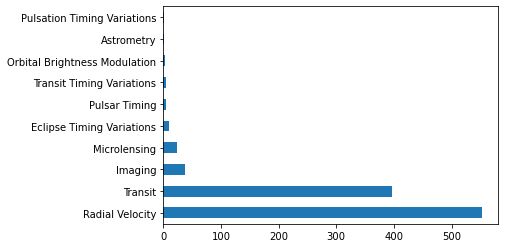

In [54]:
df['method'].value_counts().plot.barh()   # ===> barh Horizontal (Yatay Grafik)

<AxesSubplot:>

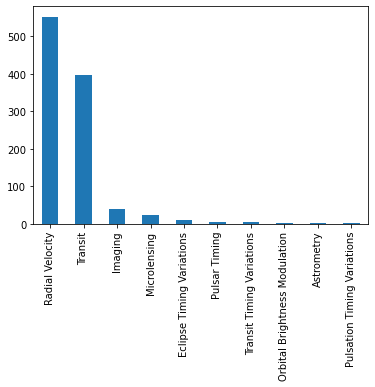

In [55]:
df['method'].value_counts().plot.bar() 

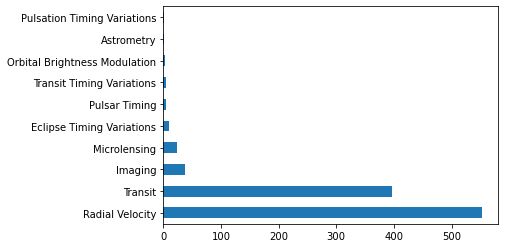

In [58]:
df['method'].value_counts().plot.barh(); # ; usteki yaziyi kapatir

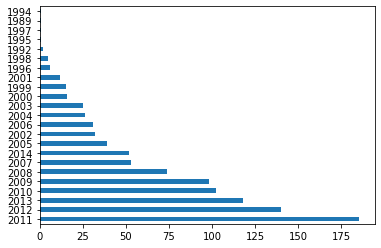

In [61]:
df['year'].value_counts().plot.barh();

# <font color='blue'>08) Surekli Degisken Ozellikleri</font>

In [8]:
df_num = df.select_dtypes(include= ['float64', 'int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [67]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [63]:
df['distance'].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [70]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [9]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


In [10]:
print("Ortalama: " , df_num["distance"].mean())

Ortalama:  264.06928217821786


# Dagilim Grafikleri

## Barplot

**Veri Seti Hikayesi (diamonds)**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [30]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hizli Bakis**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [35]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [40]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# <font color='red'>Ordinal Tanimlama</font>
### <font color='red'>Kategorik Degiskenler ordinal (kendi icinde dereceli) olarak tanitma</font>

In [41]:
from pandas.api.types import CategoricalDtype

In [45]:
df.cut = df.cut.astype(CategoricalDtype(categories = ['Fair', 'Good','Very Good', 'Premium', 'Ideal'], ordered = True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [47]:
# Categories icin liste Tanimlanabilir

cut_kategoriler = ['Fair', 'Good','Very Good', 'Premium', 'Ideal']

df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

# Dagilim Grafikleri 

## Barplot Grafigi

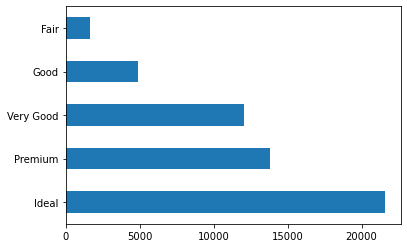

In [48]:
df['cut'].value_counts().plot.barh();

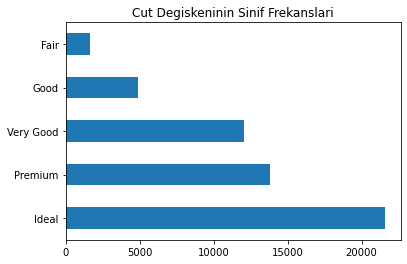

In [52]:
df['cut'].value_counts().plot.barh().set_title('Cut Degiskeninin Sinif Frekanslari');

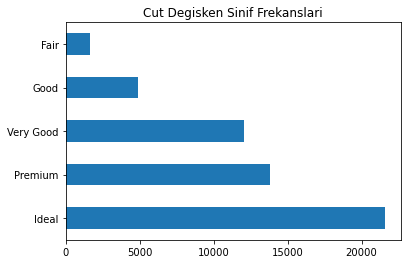

In [62]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('Cut Degisken Sinif Frekanslari'));

## <font color=red>01-sns.barplot()</font>

<AxesSubplot:xlabel='cut'>

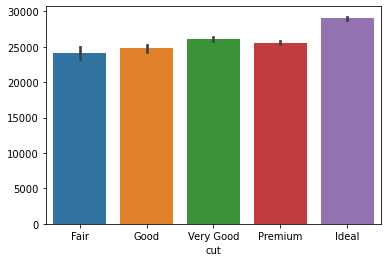

In [64]:
# Cut degisken Frekanslari
sns.barplot(x = 'cut', y = df.cut.index, data = df)

<AxesSubplot:xlabel='cut', ylabel='price'>

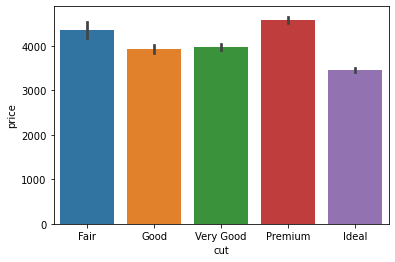

In [75]:
sns.barplot(x = 'cut', y = 'price', data = df)

<AxesSubplot:xlabel='cut'>

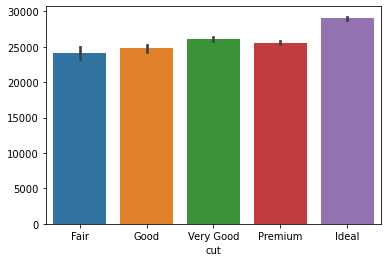

In [76]:
sns.barplot(x = 'cut', y = df.price.index, data = df)

In [77]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## hue = ' '

### Dikey sutunu istenilen degere gore ayristiriyor

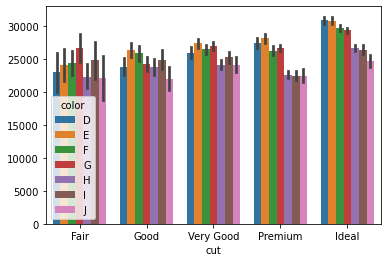

In [78]:
sns.barplot(x = 'cut', y = df.cut.index, data = df, hue = 'color' );

## Grafik Ayari

### Arka Temayi Cizgili Yapmak

In [76]:
sns.set_theme(style="whitegrid")

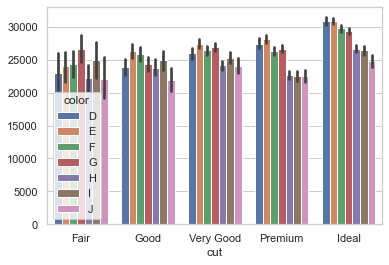

In [81]:
sns.barplot(x = 'cut', y = df.cut.index, data = df, hue = 'color' );

# Caprazlamalar

## <font color=red>02 - sns.catplot()</font>

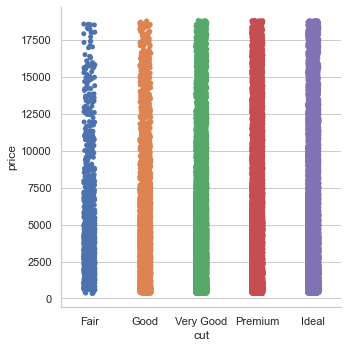

In [89]:
sns.catplot(x = 'cut', y = 'price', data = df);

In [100]:
df.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.00,4358.76,3560.39,337.00,2050.25,3282.00,5205.50,18574.00
Good,4906.00,3928.86,3681.59,327.00,1145.00,3050.50,5028.00,18788.00
Very Good,12082.00,3981.76,3935.86,336.00,912.00,2648.00,5372.75,18818.00
Premium,13791.00,4584.26,4349.20,326.00,1046.00,3185.00,6296.00,18823.00
Ideal,21551.00,3457.54,3808.40,326.00,878.00,1810.00,4678.50,18806.00


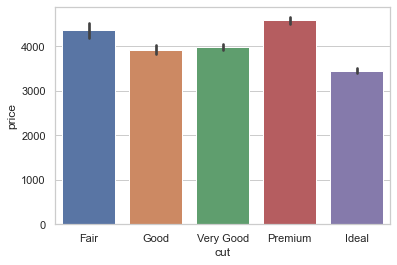

In [101]:
sns.barplot(x = 'cut', y = 'price', data = df);

## <font color='blue'>hue = ''  Argumani</font>

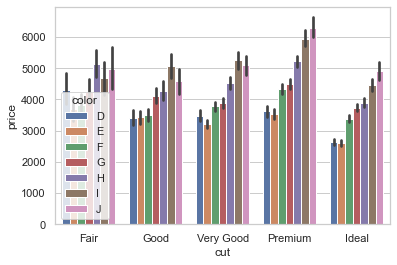

In [103]:
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df);

In [107]:
# Grafigi Dorulamak

df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D       4291.06
           E       3682.31
           F       3827.00
           G       4239.25
           H       5135.68
           I       4685.45
           J       4975.66
Good       D       3405.38
           E       3423.64
           F       3495.75
           G       4123.48
           H       4276.25
           I       5078.53
           J       4574.17
Very Good  D       3470.47
           E       3214.65
           F       3778.82
           G       3872.75
           H       4535.39
           I       5255.88
           J       5103.51
Premium    D       3631.29
           E       3538.91
           F       4324.89
           G       4500.74
           H       5216.71
           I       5946.18
           J       6294.59
Ideal      D       2629.09
           E       2597.55
           F       3374.94
           G       3720.71
           H       3889.33
           I       4451.97
           J       4918.19
Name: price, dtype: float64

# Histogram ve Yogunluk 

## <font color=red>03 - sns.distplot()</font>

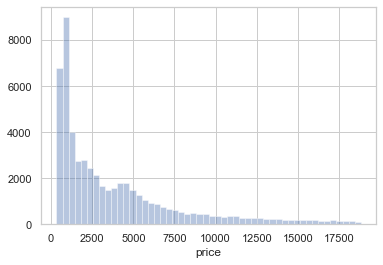

In [116]:
# Sayisal Degiskenlerin Dagilimi Hakkinda Bilgi

sns.distplot(df.price, kde = False);

## kde = True

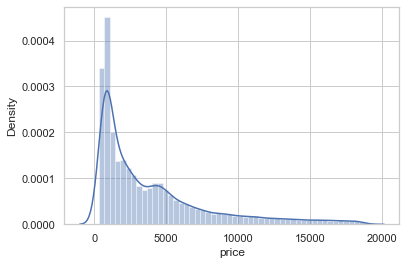

In [117]:
sns.distplot(df.price, kde = True );

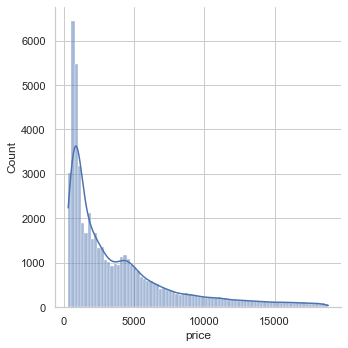

In [121]:
sns.displot(df.price, kde = True);

## bins = 10

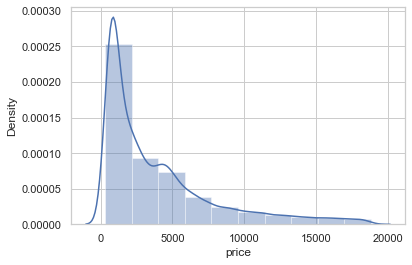

In [120]:
sns.distplot(df.price, bins = 10);

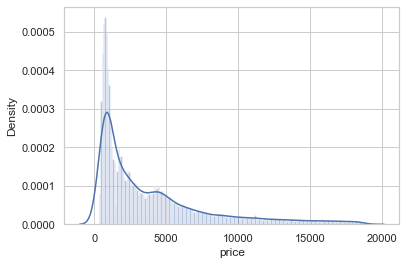

In [125]:
sns.distplot(df.price, bins = 200);

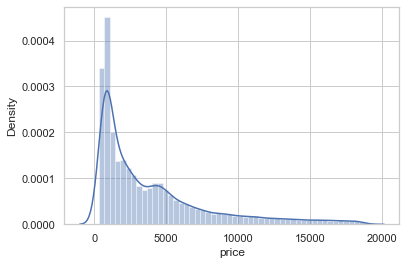

In [126]:
sns.distplot(df.price);

## hist = False

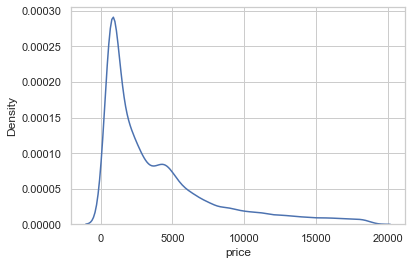

In [129]:
sns.distplot(df.price, hist = False);

In [130]:
# Grafik Yorumu
# iki tepeli yapi var , carpiklik var demek.

df.price.describe()

count   53940.00
mean     3932.80
std      3989.44
min       326.00
25%       950.00
50%      2401.00
75%      5324.25
max     18823.00
Name: price, dtype: float64

## <font color=red>04 - sns.kdeplot()</font>

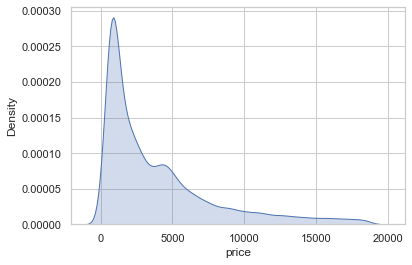

In [132]:
sns.kdeplot(df.price, shade = True);

## <font color=blue>sns.FacetGrid  ====> ust uste grafik gostermek icin></font>

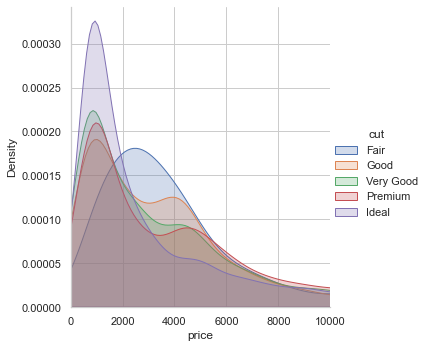

In [139]:
(sns
 .FacetGrid(df, 
              hue = 'cut',
              height = 5,
              xlim = (0,10000))
.map(sns.kdeplot, 'price', shade = True)
.add_legend()
);

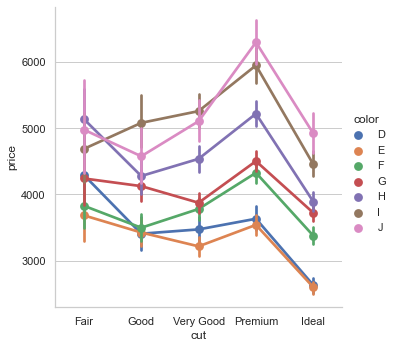

In [141]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df );

# Boxplot

## Veri Seti Hikayesi (tips)

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [13]:
#virgulden sonra gösterilecek olan sayı 4 basamak olarak ayarlanıyor.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.000,19.786,8.902,3.070,13.348,17.795,24.127,50.810
tip,244.000,2.998,1.384,1.000,2.000,2.900,3.562,10.000
size,244.000,2.570,0.951,1.000,2.000,2.000,3.000,6.000


## Kategorik DEgiskenlerin incelenmesi

In [58]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [59]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [60]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [61]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [63]:
df[['sex', 'day']].value_counts()

sex     day 
Male    Sat     59
        Sun     58
Female  Thur    32
Male    Thur    30
Female  Sat     28
        Sun     18
Male    Fri     10
Female  Fri      9
dtype: int64

## <font color=red>05 - sns.boxplot()</font>

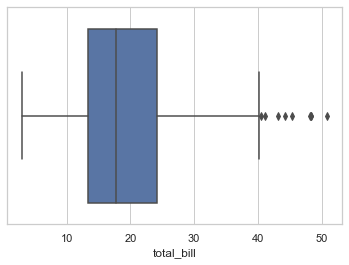

In [77]:
sns.boxplot(x = df['total_bill']);

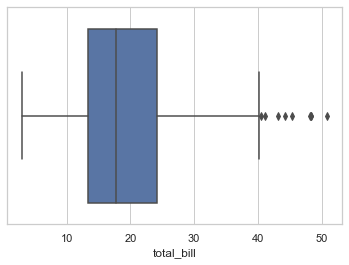

In [78]:
sns.boxplot(x = df['total_bill'], orient = 'v'); # ===> orient = 'v'  Calismadii!!!!!

<AxesSubplot:ylabel='total_bill'>

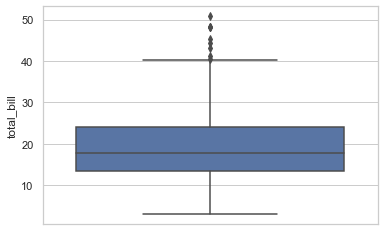

In [79]:
sns.boxplot(y = df['total_bill'])  # vertical yapmak ici y = 